Hypotheses to Test

- **Directional Homogeneity Across Time:**

- Hypothesis: Ant movement directions (represented by angle data) are uniformly distributed and do not change predictably over time.
- Surrogate Data: Generate surrogate datasets by randomly shuffling the angle data across all time points, breaking any temporal dependency but keeping the distribution of angles.


- **Speed Consistency Within and Across Ants:**

- Hypothesis: The speed of ants does not vary significantly between different ants or within the same ant over time.
- Surrogate Data: You can randomize the speed entries across all ants or within each ant to create surrogate datasets that maintain the overall statistical properties (like mean and variance) but lack any intrinsic patterns related to specific ants or time periods.


- **Spatial Distribution and Interaction:**

- Hypothesis: Ants distribute themselves randomly within a given space, without any particular patterns or clustering.
- Surrogate Data: Randomize the (x, y) positions of the ants either completely or within constrained regions (to maintain plausible movements) to test for non-random clustering or pathways.


Steps to Conduct Surrogate Testing

- Select Your Hypothesis: Decide on which aspect of the ants' behavior you are most interested in. This will determine what kind of data randomization is necessary.
- Generate Surrogate Data: Based on the selected hypothesis, generate multiple surrogate datasets. For example, if testing for directional homogeneity, shuffle the angle data while keeping other parameters constant.
- Statistical Analysis:
Calculate statistics relevant to your hypothesis for both the observed and surrogate datasets (e.g., mean, variance, clustering indices, autocorrelation).
Compare these statistics using tests like t-tests, chi-square tests, or more complex models like regression analysis if applicable.
- Interpret Results: Determine whether there are significant differences between the statistics from your observed dataset and the surrogate datasets. Significant differences suggest non-random structures or behaviors in your data.
- Report Findings: Present your methodology, analysis, and conclusions. Discuss possible biological implications of your findings regarding ant behavior and colony dynamics.

Plan

- Extract 1 dimensional metrics for either individual behaviour or collective behaviour, from individual x y coordinates.
Generate appropiate data for surrogate testing

- Metrics 
Collective centre of mass shift amplitude
number of clusters of given radius / total number of ants in clusters / total number of ants without other ant in certain radius

- Surrogate data
by AAFT - surrogate data must have the same autocorrelation to account for spatio temporal nature of the observed data - CoM shift
or data shuffling - cluster property comparisons

- We gonna know whether collective movement behaviours occur at size and rate of chance (chance given certain assumptions that defined the generated data)






extract measures - test against random
number of ant clusters
total distance between ants




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from os.path import join

In [2]:
from data_functions import get_ant_datafiles_info, preprocess_antcolony_data
import multiSyncPy
ant_data = get_ant_datafiles_info()
df = preprocess_antcolony_data(ant_data['file'][0])

In [3]:
df

,frameno,ant_id,x,y,next_x,next_y,speed,angle,cos(angle)
0,1,41,514.661,712.495,509.825,702.822,10.814519,1.107190,4.471766e-01
1,1,42,618.641,579.497,596.878,594.006,26.156056,-0.588013,8.320444e-01
2,1,43,807.256,156.324,804.838,165.996,9.969669,-1.325818,2.425356e-01
3,1,44,920.908,187.759,920.908,185.341,2.418000,-1.570796,6.123234e-17
4,1,45,896.727,502.117,899.145,502.117,2.418000,0.000000,1.000000e+00
...,...,...,...,...,...,...,...,...,...
3505,351,46,761.311,207.105,NaN,NaN,NaN,NaN,NaN
3506,351,47,825.865,155.283,NaN,NaN,NaN,NaN,NaN
3507,351,48,560.606,499.699,NaN,NaN,NaN,NaN,NaN
3508,351,49,1116.780,173.251,NaN,NaN,NaN,NaN,NaN


In [4]:
# calculate the centre of mass of the ants at each timepoint "frameno" and store it in a new column "CoM" use the x and y coordinates of the ants. Use groupby

centers_of_mass = df.groupby('frameno')[['x', 'y']].mean().reset_index()
centers_of_mass

,frameno,x,y
0,1,911.9605,417.9661
1,2,913.1698,420.8676
2,3,918.2479,426.1877
3,4,918.4903,427.8802
4,5,917.7636,426.6713
...,...,...,...
346,347,847.1554,382.9030
347,348,854.1886,381.9274
348,349,855.8602,387.0138
349,350,859.2194,383.4758


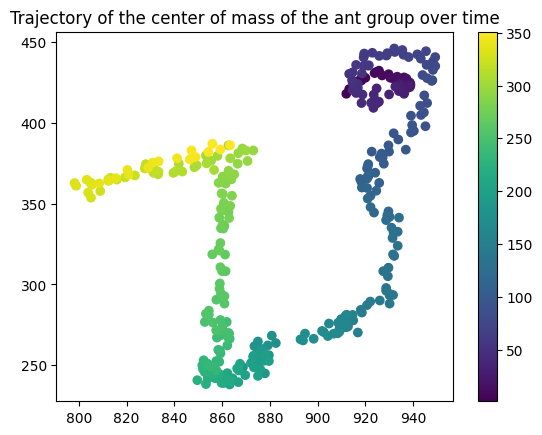

In [5]:
import matplotlib.pyplot as plt
plt.scatter(centers_of_mass['x'], centers_of_mass['y'], c=centers_of_mass['frameno'])
plt.colorbar()
plt.title('Trajectory of the center of mass of the ant group over time')
plt.show()


In [6]:
# add the center of mass to the original dataframe
df = df.merge(centers_of_mass, on='frameno', suffixes=('', '_CoM'))
df

,frameno,ant_id,x,y,next_x,next_y,speed,angle,cos(angle),x_CoM,y_CoM
0,1,41,514.661,712.495,509.825,702.822,10.814519,1.107190,4.471766e-01,911.9605,417.9661
1,1,42,618.641,579.497,596.878,594.006,26.156056,-0.588013,8.320444e-01,911.9605,417.9661
2,1,43,807.256,156.324,804.838,165.996,9.969669,-1.325818,2.425356e-01,911.9605,417.9661
3,1,44,920.908,187.759,920.908,185.341,2.418000,-1.570796,6.123234e-17,911.9605,417.9661
4,1,45,896.727,502.117,899.145,502.117,2.418000,0.000000,1.000000e+00,911.9605,417.9661
...,...,...,...,...,...,...,...,...,...,...,...
3505,351,46,761.311,207.105,NaN,NaN,NaN,NaN,NaN,863.2838,386.1844
3506,351,47,825.865,155.283,NaN,NaN,NaN,NaN,NaN,863.2838,386.1844
3507,351,48,560.606,499.699,NaN,NaN,NaN,NaN,NaN,863.2838,386.1844
3508,351,49,1116.780,173.251,NaN,NaN,NaN,NaN,NaN,863.2838,386.1844


In [7]:
# calculate the distance of each ant to the center of mass at each timepoint and store it in a new column "distance_to_CoM"
df['distance_to_CoM'] = np.sqrt((df['x'] - df['x_CoM'])**2 + (df['y'] - df['y_CoM'])**2)
df

,frameno,ant_id,x,y,next_x,next_y,speed,angle,cos(angle),x_CoM,y_CoM,distance_to_CoM
0,1,41,514.661,712.495,509.825,702.822,10.814519,1.107190,4.471766e-01,911.9605,417.9661,494.564622
1,1,42,618.641,579.497,596.878,594.006,26.156056,-0.588013,8.320444e-01,911.9605,417.9661,334.856030
2,1,43,807.256,156.324,804.838,165.996,9.969669,-1.325818,2.425356e-01,911.9605,417.9661,281.814870
3,1,44,920.908,187.759,920.908,185.341,2.418000,-1.570796,6.123234e-17,911.9605,417.9661,230.380916
4,1,45,896.727,502.117,899.145,502.117,2.418000,0.000000,1.000000e+00,911.9605,417.9661,85.518615
...,...,...,...,...,...,...,...,...,...,...,...,...
3505,351,46,761.311,207.105,NaN,NaN,NaN,NaN,NaN,863.2838,386.1844,206.077372
3506,351,47,825.865,155.283,NaN,NaN,NaN,NaN,NaN,863.2838,386.1844,233.913709
3507,351,48,560.606,499.699,NaN,NaN,NaN,NaN,NaN,863.2838,386.1844,323.263693
3508,351,49,1116.780,173.251,NaN,NaN,NaN,NaN,NaN,863.2838,386.1844,331.060351


In [9]:
# calculate the mean distance_to_CoM for each frame
mean_distance_to_CoM = df.groupby('frameno')['distance_to_CoM'].mean().reset_index()
mean_distance_to_CoM

,frameno,distance_to_CoM
0,1,299.455424
1,2,301.852586
2,3,306.721490
3,4,307.969742
4,5,308.576786
...,...,...
346,347,333.654663
347,348,338.820039
348,349,335.756475
349,350,338.409428


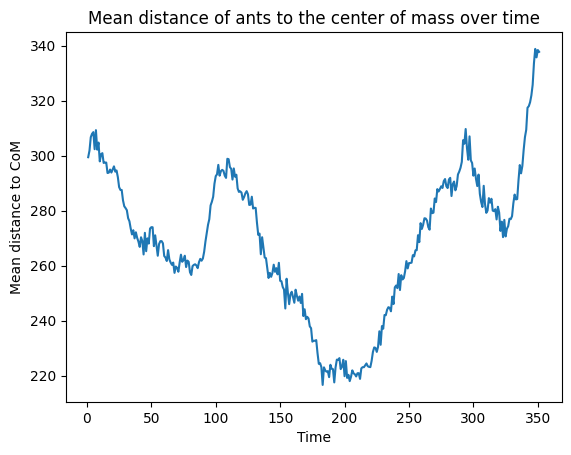

In [11]:
# plot the mean distance_to_CoM over time
plt.plot(mean_distance_to_CoM['frameno'], mean_distance_to_CoM['distance_to_CoM'])
plt.title('Mean distance of ants to the center of mass over time')
plt.xlabel('Time')
plt.ylabel('Mean distance to CoM')
plt.show()

In [14]:
def count_close_ants(group):
    # Extract coordinates
    coordinates = group[['x', 'y']].to_numpy()
    n = len(coordinates)
    close_count = 0
    
    # Calculate pairwise distances
    for i in range(n):
        # Compute distances from the ith ant to all other ants
        distances = np.sqrt(np.sum((coordinates - coordinates[i])**2, axis=1))
        
        # Check if there is at least one ant closer than 20 units, excluding the ant itself
        if np.any((distances > 0) & (distances < 100)):
            close_count += 1
    
    return close_count

# Group by 'frameno' and apply the function
close_ants_count = df.groupby('frameno').apply(count_close_ants)

# Print the result
print(close_ants_count)


frameno
1      2
2      2
3      2
4      2
5      4
      ..
347    3
348    3
349    4
350    3
351    3
Length: 351, dtype: int64


/tmp/ipykernel_19821/1453538872.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  close_ants_count = df.groupby('frameno').apply(count_close_ants)


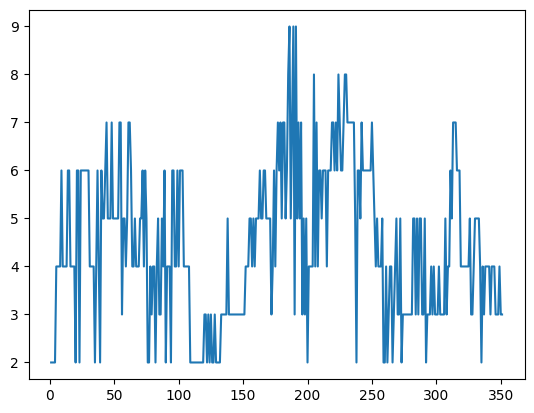

In [15]:
# plot close_ants_count over time
plt.plot(close_ants_count)
